In [3]:
import pandas as pd
import matplotlib.pyplot as plt

## Gráficos que mostram a evolução da temperatura média entre as cidades

In [5]:
dados = pd.read_csv("GlobalLandTemperaturesByState.csv")
dados.head()

,dt,AverageTemperature,AverageTemperatureUncertainty,State,Country
0,1855-05-01,25.544,1.171,Acre,Brazil
1,1855-06-01,24.228,1.103,Acre,Brazil
2,1855-07-01,24.371,1.044,Acre,Brazil
3,1855-08-01,25.427,1.073,Acre,Brazil
4,1855-09-01,25.675,1.014,Acre,Brazil


# Adição de filtro de anos. Apenas anos maiores que 1800.

In [4]:
## Limpeza dos dados utilizando o método .dropna() para remover linhas com valores ausentes 
dados.dropna(inplace=True)

print(dados.head())

           dt  AverageTemperature  AverageTemperatureUncertainty State Country
0  1855-05-01              25.544                          1.171  Acre  Brazil
1  1855-06-01              24.228                          1.103  Acre  Brazil
2  1855-07-01              24.371                          1.044  Acre  Brazil
3  1855-08-01              25.427                          1.073  Acre  Brazil
4  1855-09-01              25.675                          1.014  Acre  Brazil


In [5]:
# Convertendo a coluna "dt" para dados de data
dados['dt'] = pd.to_datetime(dados['dt'])
#observando análises anteriores foi possível notar que existe uma defasagem nos dados
#anteriores ao ano de 1800
dados.drop(dados[dados['dt']<='1800-01-01'].index, inplace=True)

# Extraindo o ano da coluna "dt" para realizarmos uma análise por ano
dados["year"] = dados["dt"].dt.year

## Aqui começa a análise exploratória de dados para descobrir padrões e tendências, primeiro
## agrupando as temperaturas por ano e estado
dados_agrupados = dados.groupby(["year","State"]).mean()

dados_agrupados.head()

AverageTemperature  AverageTemperatureUncertainty
year State                                                                 
1800 Adygey                        11.061455                       3.109182
     Alabama                       17.971091                       3.117545
     Andaman And Nicobar           27.349818                       1.793091
     Andhra Pradesh                27.468000                       2.222727
     Arkansas                      16.645636                       3.281818

In [6]:
## Vamos verificar quais estados podemos checar dentro desse conjunto de dados
estados = dados['State'].unique()
print(estados)

['Acre' 'Adygey' 'Aga Buryat' 'Alabama' 'Alagoas' 'Alaska' 'Alberta'
 'Altay' 'Amazonas' 'Amur' 'Andaman And Nicobar' 'Andhra Pradesh' 'Anhui'
 'Arizona' 'Arkansas' "Arkhangel'Sk" 'Arunachal Pradesh' 'Assam'
 "Astrakhan'" 'Australian Capital Territory' 'Bahia' 'Bashkortostan'
 'Beijing' 'Belgorod' 'Bihar' 'British Columbia' 'Bryansk' 'Buryat'
 'California' 'Chandigarh' 'Chechnya' 'Chelyabinsk' 'Chhattisgarh' 'Chita'
 'Chongqing' 'Chukot' 'Chuvash' 'City Of St. Petersburg' 'Colorado'
 'Connecticut' 'Dadra And Nagar Haveli' 'Dagestan' 'Daman And Diu'
 'Delaware' 'Delhi' 'District Of Columbia' 'Distrito Federal' 'Evenk'
 'Florida' 'Fujian' 'Gansu' 'Georgia (State)' 'Goa' 'Gorno Altay'
 'Guangdong' 'Guangxi' 'Guizhou' 'Gujarat' 'Hainan' 'Haryana' 'Hawaii'
 'Hebei' 'Heilongjiang' 'Henan' 'Himachal Pradesh' 'Hubei' 'Hunan' 'Idaho'
 'Illinois' 'Indiana' 'Ingush' 'Iowa' 'Irkutsk' 'Ivanovo'
 'Jammu And Kashmir' 'Jharkhand' 'Jiangsu' 'Jiangxi' 'Jilin'
 'Kabardin Balkar' 'Kaliningrad' 'Kalmyk' 'K

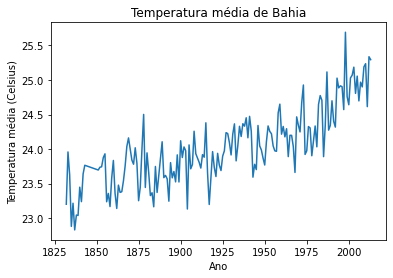

In [7]:
## Por fim, utilizaremos o matplotib para plotar os gráficos a partir dos dados agrupados.
## Esse gráfico mostra a evolução da temperatura média por ano em uma cidade espec
## Utilização da função desenvolvida pelo jhonantan
def Grafico(localidade):
    dados_local = dados_agrupados.loc[(slice(None), localidade), :]
    dados_local = dados_local.reset_index(level=0)

    plt.plot(dados_local["year"], dados_local["AverageTemperature"])
    plt.xlabel("Ano")
    plt.ylabel("Temperatura média (Celsius)")
    plt.title("Temperatura média de "+ localidade)
    plt.show()

Grafico("Bahia")